In [1]:
import os 
  
# Specify path 
path = "./audio/DrmBreak01_100bpm.wav"
  
# Check whether the specified 
# path exists or not 
isExist = os.path.exists(path) 
print(isExist)


True


/tmp/ipykernel_690577/913879797.py:6: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, data = wavfile.read(path)


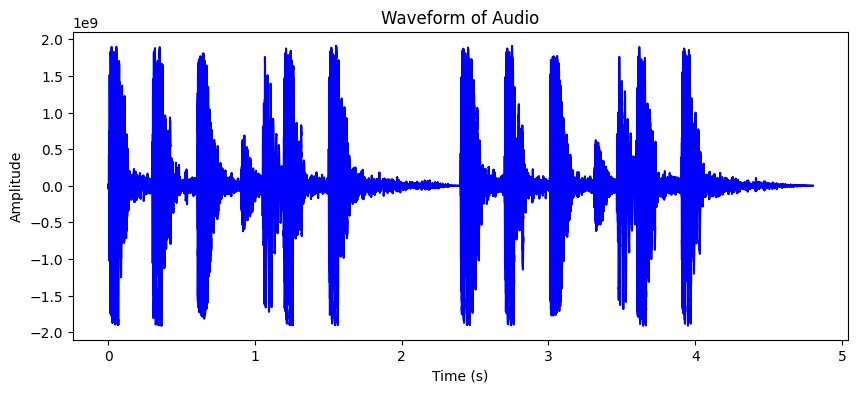

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Load the .wav file
sample_rate, data = wavfile.read(path)

# Extracting the time points
time = np.arange(0, len(data)) / sample_rate

# Plotting the waveform
plt.figure(figsize=(10, 4))
plt.plot(time, data, color='b')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Waveform of Audio')
plt.show()


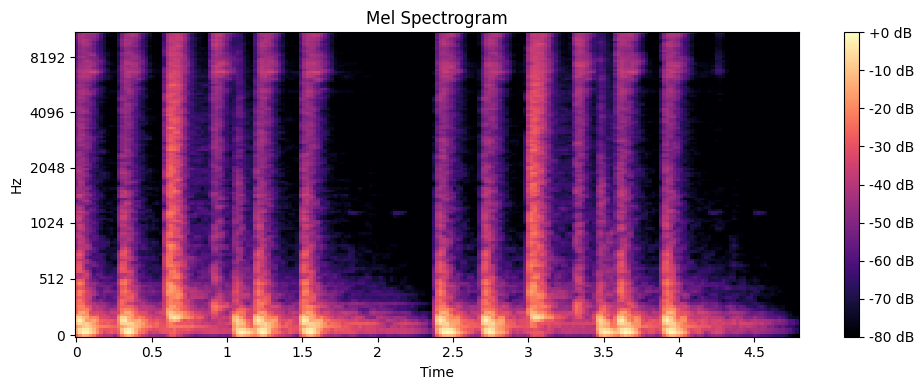

In [3]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load the audio file
y, sr = librosa.load(path)

# Compute the spectrogram
D = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)

# Convert to dB (logarithmic scale)
DB = librosa.power_to_db(D, ref=np.max)

# Plot the spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(DB, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.tight_layout()
plt.show()


# DetectOnsets

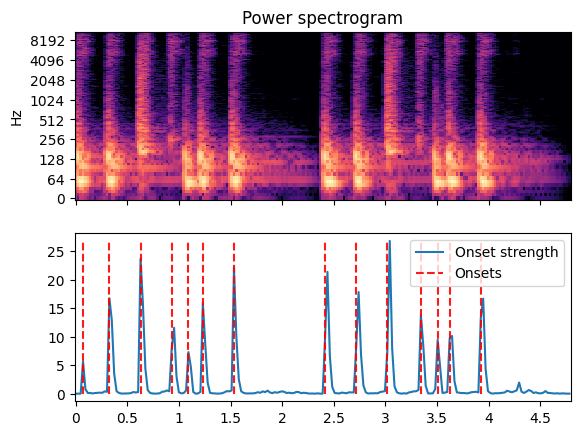

In [4]:
# Adjusting the onset detection parameters
hop_length = 512

# Compute the onset envelope
onset_env = librosa.onset.onset_strength(y=y, sr=sr)

# Detect the onsets
onset_frames = librosa.onset.onset_detect(onset_envelope=onset_env, sr=sr)

# Compute the time points
times = librosa.times_like(onset_env, sr=sr)

# Compute the magnitude spectrogram
D = np.abs(librosa.stft(y))

# Plotting the spectrogram and onsets
fig, ax = plt.subplots(nrows=2, sharex=True)

# Power spectrogram
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),
                         x_axis='time', y_axis='log', ax=ax[0])
ax[0].set(title='Power spectrogram')
ax[0].label_outer()

# Onset strength and detected onsets
ax[1].plot(times, onset_env, label='Onset strength')
ax[1].vlines(times[onset_frames], 0, onset_env.max(), color='r', alpha=0.9,
             linestyle='--', label='Onsets')
ax[1].legend()

plt.show()

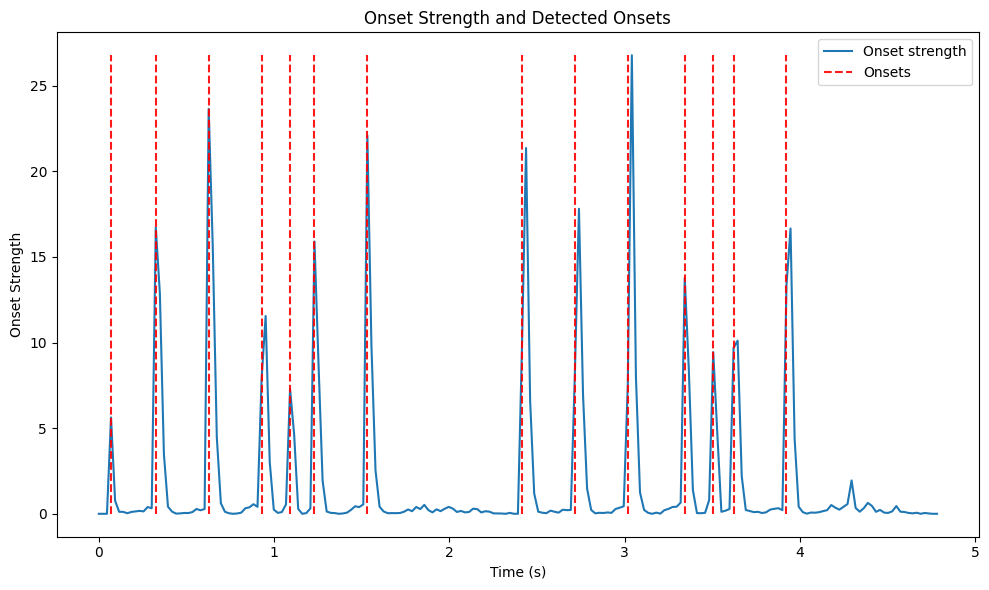

In [5]:
from scipy.io.wavfile import write
from IPython.display import Audio
# Load the audio file
y, sr = librosa.load(path)

# Adjusting the onset detection parameters
hop_length = 512

# Compute the onset envelope
onset_env = librosa.onset.onset_strength(y=y, sr=sr)

# Detect the onsets
onset_frames = librosa.onset.onset_detect(onset_envelope=onset_env, sr=sr)

# Compute the time points
times = librosa.times_like(onset_env, sr=sr)

# Compute the magnitude spectrogram
D = np.abs(librosa.stft(y))

# Beep sound parameters
beep_duration = 0.1  # in seconds
beep_freq = 1000  # in Hz
beep_amplitude = 0.5  # amplitude of the beep sound

# Create the beep sound
beep_times = librosa.frames_to_time(onset_frames, sr=sr)
beep_signal = beep_amplitude * np.sin(2 * np.pi * beep_freq * np.linspace(0, beep_duration, int(sr * beep_duration)))

# Combine the beep with the original signal
y_with_beeps = np.copy(y)
for beep_time in beep_times:
    beep_start = int(beep_time * sr)
    beep_end = beep_start + len(beep_signal)
    y_with_beeps[beep_start:beep_end] += beep_signal

# Plotting the waveform with onsets and beeps
plt.figure(figsize=(10, 6))
plt.plot(times, onset_env, label='Onset strength')
plt.vlines(times[onset_frames], 0, onset_env.max(), color='r', alpha=0.9, linestyle='--', label='Onsets')
plt.xlabel('Time (s)')
plt.ylabel('Onset Strength')
plt.title('Onset Strength and Detected Onsets')
plt.legend()
plt.tight_layout()
plt.show()

# Save the audio with beeps
write('audio_with_beeps.wav', sr, y_with_beeps)
Audio(data=y_with_beeps, rate=sr)


In [9]:
import os
import sys

# Add /usr/local/lib to the LD_LIBRARY_PATH
os.environ['LD_LIBRARY_PATH'] = '/usr/local/lib:' + os.environ.get('LD_LIBRARY_PATH', '')

# Now import essentia
import essentia


ImportError: libessentia.so: cannot open shared object file: No such file or directory